# Nested Monte-Carlo Sampling


### 1. Introduction

This notebook demonstrates the use of nested Monte-Carlo sampling and compare it
to direct sampling to estimate the expected value of the log-likelihood of an observation $ x_t $ given latent variables $ z_1 $ and $ z_2 $. The latent variables are assumed to follow a joint normal distribution $q(z_1,\, z_2)$.

In other words, we wish to compute
$\mathbb{E}_{q(z_1, z_2)}\big[ \log p(x_t \,|\, z_1,\, z_2) \big]$ using the nested Monte-Carlo sampling method.

### 2. Parameters for the Normal Distributions

- **Mean of $ z_1 $**: $ \mu_{z1} = 0.0 $
- **Standard Deviation of $ z_1 $**: $ \sigma_{z1} = 1.0 $
- **Mean of $ z_2 $**: $ \mu_{z2} = 0.0 $
- **Standard Deviation of $ z_2 $**: $ \sigma_{z2} = 1.0 $
- **Correlation Coefficient between $ z_1 $ and $ z_2 $**: $ \rho = 0.5 $

### 3. Expression of the distributions
$q(z_1) = \mathcal{N}\left(z_1; \,\mu_{z_1}, \, \sigma_{z_1} \right)$
and
$q(z_2) = \mathcal{N}\left(z_2; \,\mu_{z_2}, \, \sigma_{z_2} \right).$

$q(z_1,\, z_2) = \mathcal{N}\left([z_1,\, z_2];\, \mu, \;\Sigma \right)$, with the mean and covariance matrix for the joint normal distribution of $ z_1 $ and $ z_2 $ given respectively by:

\begin{equation*}
\mu = \begin{bmatrix}
\mu_{z_1} \\
\mu_{z_2}
\end{bmatrix},
\quad
\Sigma = \begin{bmatrix}
\sigma_{z_1}^2 & \rho \sigma_{z_1} \sigma_{z_2} \\
\rho \sigma_{z_1} \sigma_{z_2} & \sigma_{z_2}^2
\end{bmatrix}
\end{equation*}

Given the correlation $ \rho $ between $ z_1 $ and $ z_2 $, the conditional distribution of $ z_2 $ given $ z_1 $ is a normal distribution with the following [mean and variance](https://www.probabilitycourse.com/chapter5/5_3_2_bivariate_normal_dist.php):

- **Mean**:
  \begin{equation*}
  \mathbb{E}[z_2 | z_1] = \mu_{z_2} +
  \rho \left( \frac{z_1 - \mu_{z_1}}{\sigma_{z_1}} \right) \sigma_{z_2}
  \end{equation*}

- **Variance**:
  \begin{equation*}
  \text{Var}(z_2 | z_1) = \sigma_{z_2}^2 (1 - \rho^2)
  \end{equation*}

\\
In the nested Monte-Carlo sampling, we sample multiple
$z_1 \sim \mathcal{N}\left(\mu_{z_1}, \, \sigma_{z_1} \right)$
values. Given a sampled $\dot{z}_1$, we can sample $ z_2 $ from the conditional distribution:

\begin{equation*}
q(z_2 | z_1) = \mathcal{N}\left( \mu_{z_2} +
\rho \left( \frac{\dot{z}_1 - \mu_{z_1}}{\sigma_{z_1}} \right)
 \sigma_{z_2}, \, \sigma_{z_2}^2 (1 - \rho^2) \right)
\end{equation*}

### 4. Log-Likelihood Function

We suppose that the likelihood of the observation $x_t$ given $z_1$ and $z_2$ is a Gaussian distribution with mean $ \phi(z_1, z_2) $ and fixed variance $\sigma = 1$. Thus, the log-likelyhood is:

\begin{equation*}
\log p(x_t \,|\, z_1,\, z_2) = \log \mathcal{N}(x_t\,;\, \phi(z_1, z_2),\, 1.0)
\end{equation*}

### 5. Nested Monte-Carlo Sampling

Below we will explicit the steps involve for estimating
$\mathbb{E}_{q(z_1, z_2)}\big[ \log p(x_t \,|\, z_1,\, z_2) \big]$ using the nested Monte-Carlo sampling method.

First of all, lets rewrite $\mathbb{E}_{q(z_1, z_2)}\big[ \log p(x_t \,|\, z_1,\, z_2) \big]$ using the cascade property of expectation:


   \begin{equation*}
   \mathbb{E}_{q(z_1, z_2)}\big[ \log p(x_t \,|\, z_1,\, z_2) \big] =
   \mathbb{E}_{q(z_1)}\Big[
   \mathbb{E}_{q(z_2 \, | \, z_1)}\big[ \log p(x_t \,|\, z_1,\, z_2) \big]\Big]
   \end{equation*}

\\
Therefore, the expectation is estimated by looping $N$ times
throught the following steps:

1. **Sample $z_{1_i} $ from $ q(z_1) $**:

   \begin{equation*}
   z_{1_i} \sim \mathcal{N}(\mu_{z_{1}}, \sigma_{z_{1}}^2)
   \end{equation*}

2. **Take $M$ i.i.d sample from $ q(z_2 | z_{1_i}) $**:

   \begin{equation*}
   z_{2_j} \sim \mathcal{N}(\mu_{z_{2}} + \rho
   \frac{\big(z_{1_i} - \mu_{z_{1}}\big)}{\sigma_{z_1}}\sigma_{z_2},
   \, \sigma_{z_{2}}^2 (1 - \rho^2))
   \end{equation*}

3. **For each sample $z_{2_j}$ evaluate the log-likelihood $ \log p(x_t | \, z_{1_i}, z_{2_j}) $**:

   \begin{equation*}
   \log p(x_t | \, z_{1_i}, z_{2_j}) =
   \log \mathcal{N} \Big(x_t; \,
   \phi \big( z_{1_i}, z_{2_j} \big), \, 1.0 \Big)
   \end{equation*}

4. **Compute the mean**:

   \begin{equation*}
   \mu_{z_{1_i}} = \frac{1}{M} \sum_{j=1}^{M} \log p(x_t | \, z_{1_i}, z_{2_j})
   \end{equation*}

**Finaly, average the $\mu_{z_{1_i}} $**:
   \begin{equation*}
   \text{Average Log-Likelihood} = \frac{1}{N} \sum_{i=1}^{N}
   \mu_{z_{1_i}} = \frac{1}{N} \sum_{i=1}^{N}
   \frac{1}{M} \sum_{j=1}^{M} \log p(x_t | \, z_{1_i}, z_{2_j})
   \end{equation*}

### 7. Direct Sampling from Joint Normal Distribution

The direct sampling method involves the following steps:

1. **Sample $ (z_1, z_2) $ from the joint normal distribution**:
   \begin{equation*}
   (z_1, z_2) \sim \mathcal{N}(\mu, \Sigma)
   \end{equation*}
   
2. **Evaluate the log-likelihood $ \log p(x_t | \, (z_1, z_2)) $**:
   \begin{equation*}
   \log p(x_t | \, (z_1, z_2)) =
   \log \mathcal{N}\big(x_t;\, \phi(z_1, z_2), \, 1.0\big)
   \end{equation*}

3. **Average the log-likelihoods**:
   \begin{equation*}
   \text{Average Log-Likelihood} = \frac{1}{N}
   \sum_{i=1}^{N} \log p \big(x_t \, | \, (z_1, z_2)_i \big)
   \end{equation*}


---
## Let's code it

In [1]:
import numpy as np
import pandas as pd
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style
sns.set(style="whitegrid")

### 8. Example Usage

- $ N = 100 $
- $ M = 10 $
- $ \mu_{z_1} = 0.0, \, \sigma_{z_1} = 1.0$
- $ \mu_{z_2} = 0.0, \, \sigma_{z_2} = 1.0$
- $ \rho = 0.5$

In [32]:
# Parameters for the normal distributions
mu_z1 = 0.0
sigma_z1 = 1.0
mu_z2 = 0.0
sigma_z2 = 1.0
rho = 0.5  # Correlation coefficient between z_1 and z_2

# Covariance matrix for the joint normal distribution
cov_matrix = np.array([[sigma_z1**2, rho * sigma_z1 * sigma_z2],
                       [rho * sigma_z1 * sigma_z2, sigma_z2**2]])

# Number of Monte-Carlo samples
N = 100

# Number of samples for z_1
M = 10


- $ \phi(z_1, z_2) = z_1^2 + z_2^2$

In [33]:
def phi_z(z_1, z_2):
    """
    Non-linear function of z_1 and z_2.

    Parameters:
    z_1 (float): The first latent variable.
    z_2 (float): The second latent variable.

    Returns:
    float: The value of the non-linear function phi(z_1, z_2).
    """
    # Non-linear function: quadratic function
    return z_1**2 + z_2**2

In [34]:

# Function to compute the log-likelihood p(x_t | z_1, z_2)
def log_likelihood(x_t, phi_z_val):
    """
    Compute the log-likelihood of the observation x_t given phi(z_1, z_2).

    Parameters:
    x_t (float): The observed value.
    phi_z_val (float): The value of the non-linear function phi(z_1, z_2).

    Returns:
    float: The log-likelihood of the observation x_t.
    """
    # Example: Gaussian log-likelihood with mean given by
    # \phi(z_1, z_2) and fixed variance
    return multivariate_normal.logpdf(np.array([x_t]), mean=phi_z_val, cov=1.0)

# Nested Monte-Carlo sampling
def nested_monte_carlo_sampling(x_t, N, M):
    """
    Perform nested Monte-Carlo sampling to estimate the log-likelihood.

    Parameters:
    x_t (float): The observed value.
    N (int): The number of Monte-Carlo samples.
    M (int): The number of samples for z_1.

    Returns:
    tuple: A tuple containing the average log-likelihood, z_1 samples, z_2 samples,
    and log-likelihoods.
    """
    means = np.zeros((N))
    z_1_samples = np.zeros((N))
    z_2_samples = np.zeros((N,M))
    log_likelihoods = np.zeros((N,M))

    for i in range(N):
      # Step 1: Sample z_1 from q(z_1)
      z_1 = np.random.normal(loc=mu_z1, scale=sigma_z1, size=1)
      z_1_samples[i] = z_1.item()

      # Step 2:
      for j in range(M):

        # Step 3: Sample z_2 from q(z_2 | z_1)
        z_2 = np.random.normal(loc=mu_z2 + rho * (z_1 - mu_z1) * sigma_z2/sigma_z1,
                              scale=sigma_z2 * np.sqrt(1 - rho**2))
        z_2_samples[i][j] = z_2.item()

        # Step 4: Evaluate the log-likelihood p(x_t | z_2)
        phi_z_val = phi_z(z_1, z_2)
        log_likelihood_val = log_likelihood(x_t, phi_z_val)
        log_likelihoods[i][j] = log_likelihood_val

    # Step 5: Average the log-likelihoods
    average_log_likelihood = log_likelihoods.mean()
    #print(f"Average Log-Likelihood: {average_log_likelihood}")

    return average_log_likelihood, z_1_samples, z_2_samples, log_likelihoods

# Direct sampling from joint normal distribution
def direct_sampling(x_t, N):
    """
    Perform direct sampling from the joint normal distribution to estimate the
    log-likelihood.

    Parameters:
    x_t (float): The observed value.
    N (int): The number of Monte-Carlo samples.

    Returns:
    tuple: A tuple containing the average log-likelihood, z_samples,
    and log-likelihoods.
    """
    z_samples = np.zeros((N))
    log_likelihoods = np.zeros((N))

    # Step 1: Sample (z_1, z_2) from the joint normal distribution
    z_samples = multivariate_normal.rvs(mean=[mu_z1, mu_z2], cov=cov_matrix,
                                        size=N)

    # Step 2: Evaluate the log-likelihood p(x_t | z)
    for i in range(N):
        phi_z_val = phi_z(z_samples[i, 0], z_samples[i, 1])
        log_likelihoods[i] = log_likelihood(x_t, phi_z_val)

    return z_samples, log_likelihoods



- **Observation**: $ x_t = 1.0 $

In [35]:
# Example observation
x_t = 1.0

# Nested Monte-Carlo sampling
(avg_log_likelihood_nested, z_1_samples_nested, z_2_samples_nested,
 log_likelihoods_nested) = nested_monte_carlo_sampling(x_t, N, M)

# Direct sampling from joint normal distribution
z_samples_direct, log_likelihoods_direct = direct_sampling(x_t, N*M)

print(f"Average Log-Likelihood (Nested Monte-Carlo): {avg_log_likelihood_nested}")
print(f"Average Log-Likelihood (Direct Sampling): {log_likelihoods_direct.mean()}")

Average Log-Likelihood (Nested Monte-Carlo): -4.300763616423539
Average Log-Likelihood (Direct Sampling): -3.657283461541248


### Plotting

1. **Distribution of $ z_1 $ samples (Nested Monte-Carlo)**
2. **Distribution of $ z_2 $ samples (Nested Monte-Carlo)**
3. **Distribution of log-likelihoods (Nested Monte-Carlo)**
4. **Joint distribution of $ z_1 $ and $ z_2 $ (Nested Monte-Carlo)**
5. **Joint distribution of $ z_1 $ and $ z_2 $ (Direct Sampling)**
6. **Distribution of log-likelihoods (Direct Sampling)**

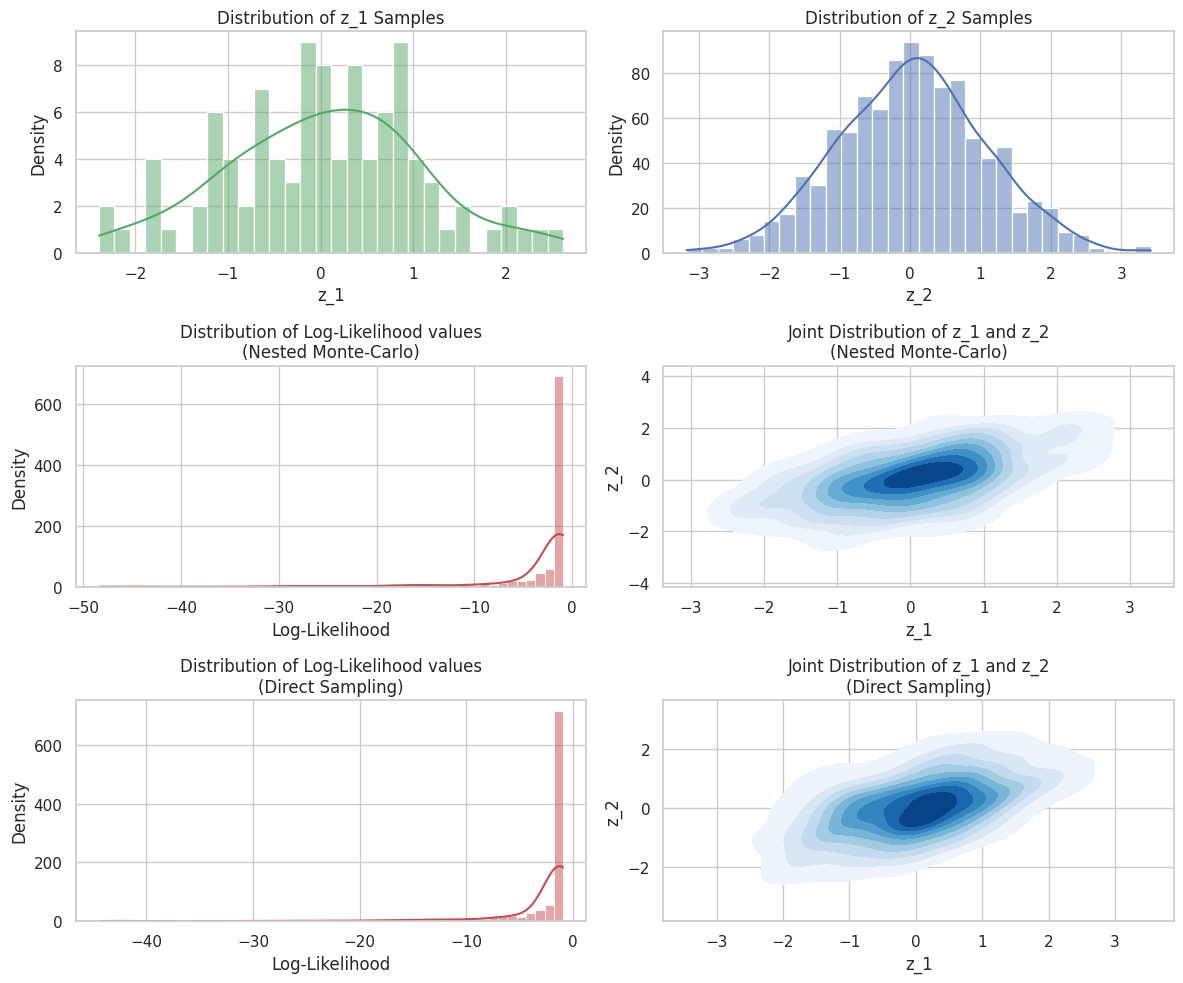

In [36]:
# Plotting
plt.figure(figsize=(12, 10))

# Plot 1: Distribution of z_1 samples (Nested Monte-Carlo)
plt.subplot(3, 2, 1)
sns.histplot(z_1_samples_nested, bins=30, kde=True, color='g')
plt.title('Distribution of z_1 Samples')
plt.xlabel('z_1')
plt.ylabel('Density')

# Plot 2: Distribution of z_2 samples (Nested Monte-Carlo)
plt.subplot(3, 2, 2)
sns.histplot(z_2_samples_nested.reshape(-1), bins=30, kde=True, color='b')
plt.title('Distribution of z_2 Samples given z_1')
plt.xlabel('z_2')
plt.ylabel('Density')

# Plot 3: Distribution of log-likelihoods (Nested Monte-Carlo)
plt.subplot(3, 2, 3)
log_likelihoods_nested_filtered = log_likelihoods_nested.reshape(-1)
log_likelihoods_nested_filtered = log_likelihoods_nested_filtered[
    (log_likelihoods_nested_filtered >= -50)]
sns.histplot(log_likelihoods_nested_filtered, bins=50, kde=True, color='r')
plt.title('Distribution of Log-Likelihood values\n(Nested Monte-Carlo)')
plt.xlabel('Log-Likelihood')
plt.ylabel('Density')

# Plot 4: Joint distribution of z_1 and z_2 (Nested Monte-Carlo)
plt.subplot(3, 2, 4)
# Reshape z_2_samples_nested to be 1-dimensional
z_2_samples_nested = z_2_samples_nested.reshape(-1)
# Create a DataFrame with z_1 and z_2 samples
z_samples_nested_df = pd.DataFrame({'z_1': z_1_samples_nested.repeat(M),
                                    'z_2': z_2_samples_nested.flatten()})
sns.kdeplot(z_samples_nested_df, x='z_1', y='z_2', cmap="Blues", fill=True,
            thresh=0.05)
plt.title('Joint Distribution of z_1 and z_2\n(Nested Monte-Carlo)')
plt.xlabel('z_1')
plt.ylabel('z_2')

# Plot 5: Joint distribution of z_1 and z_2 (Direct Sampling)
plt.subplot(3, 2, 6)
z_samples_df = pd.DataFrame(z_samples_direct, columns=['z_1', 'z_2'])
sns.kdeplot(z_samples_df, x='z_1', y='z_2', cmap="Blues", fill=True, thresh=0.05)
plt.title('Joint Distribution of z_1 and z_2\n(Direct Sampling)')
plt.xlabel('z_1')
plt.ylabel('z_2')

# Plot 6: Distribution of log-likelihoods (Direct Sampling)
plt.subplot(3, 2, 5)
log_likelihoods_direct_filtered = log_likelihoods_direct[
    (log_likelihoods_direct >= -50)]
sns.histplot(log_likelihoods_direct_filtered, bins=50, kde=True, color='r')
plt.title('Distribution of Log-Likelihood values\n(Direct Sampling)')
plt.xlabel('Log-Likelihood')
plt.ylabel('Density')

plt.tight_layout()
#plt.show()